In [25]:
%load_ext autoreload
%autoreload 2

# Control figure size
figsize=(14, 4)

from load_util import load_util
from plot_util import plot_util
from pred_util import pred_util
import os

data_folder = os.path.join('..', 'data')
file_name = "Full_prem"


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [26]:
#Run this to create a new data file
leagues = ['E0']
start_year, end_year = 2005, 2025
load_util.fetch_data_into_file(data_folder=data_folder, file_name=file_name, start_year=start_year, end_year=end_year, leagues=leagues)

Data fetched and saved to ../data/Full_prem.csv


In [27]:
data = load_util.load_data(data_folder, file_name)
data

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,AF,HC,AC,HY,AY,HR,AR,PSH,PSD,PSA
0,E0,2005-08-13,Aston Villa,Bolton,2.0,2.0,D,2.0,2.0,D,...,16.0,7.0,8.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN
1,E0,2005-08-13,Everton,Man United,0.0,2.0,A,0.0,1.0,A,...,14.0,8.0,6.0,3.0,1.0,0.0,0.0,NaN,NaN,NaN
2,E0,2005-08-13,Fulham,Birmingham,0.0,0.0,D,0.0,0.0,D,...,13.0,6.0,6.0,1.0,2.0,0.0,0.0,NaN,NaN,NaN
3,E0,2005-08-13,Man City,West Brom,0.0,0.0,D,0.0,0.0,D,...,11.0,3.0,6.0,2.0,3.0,0.0,0.0,NaN,NaN,NaN
4,E0,2005-08-13,Middlesbrough,Liverpool,0.0,0.0,D,0.0,0.0,D,...,11.0,5.0,0.0,2.0,3.0,1.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7296,E0,2024-10-19,Southampton,Leicester,2.0,3.0,A,2.0,0.0,H,...,10.0,10.0,6.0,5.0,3.0,1.0,0.0,2.34,3.53,3.09
7297,E0,2024-10-19,Bournemouth,Arsenal,2.0,0.0,H,0.0,0.0,D,...,11.0,7.0,4.0,1.0,1.0,0.0,1.0,5.01,4.13,1.68
7298,E0,2024-10-20,Wolves,Man City,1.0,2.0,A,1.0,1.0,D,...,5.0,1.0,18.0,4.0,1.0,0.0,0.0,9.01,5.92,1.32
7299,E0,2024-10-20,Liverpool,Chelsea,2.0,1.0,H,1.0,0.0,H,...,13.0,1.0,6.0,4.0,3.0,0.0,0.0,1.62,4.47,5.08


In [28]:
all_teams = load_util.get_all_teams(data)
ELO = pred_util.ELO(init_rating=1500, teams=all_teams, k_factor=32, draw_factor=0.25, home_advantage=100)
ELO_predictions = ELO.perform_simulations(data)
data_with_probs = ELO.get_probabilities(ELO_predictions)
print(pred_util.evaluate_probability_prediction(data_with_probs)*100, '%')

51.93809067251062 %


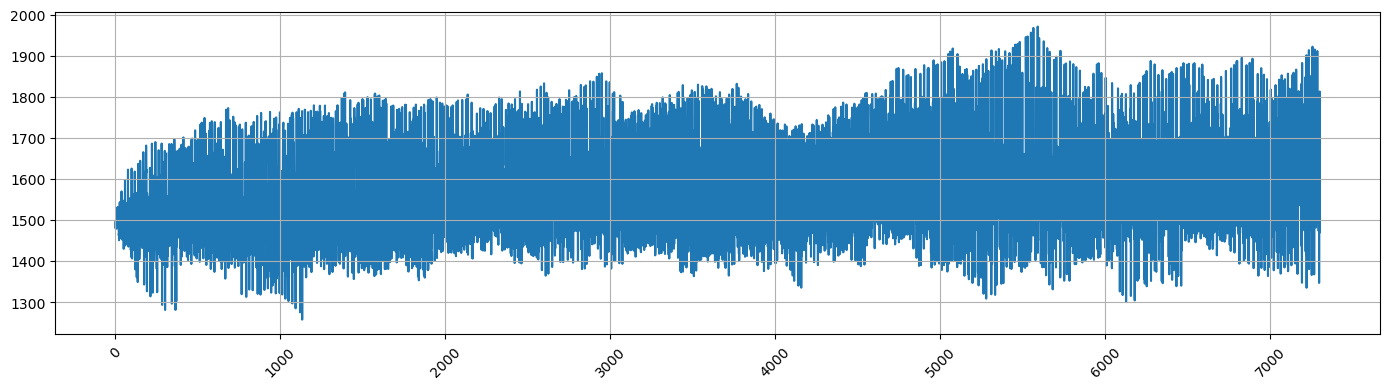

In [33]:
plot_util.plot_series(data_with_probs['Home ELO'], figsize=figsize)